In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import pickle

In [137]:
df = pd.read_csv('../dataset/churn-modeling.csv')

In [138]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [141]:
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [142]:
df[['RowNumber', 'CustomerId','Exited']].corr()

,RowNumber,CustomerId,Exited
RowNumber,1.000000,0.004202,-0.016571
CustomerId,0.004202,1.000000,-0.006248
Exited,-0.016571,-0.006248,1.000000


In [143]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [144]:
for col in df.columns:
    if col in ['Geography', 'Gender']:
        print(col, df[col].unique())
        print("-------------------------------------")

Geography ['France' 'Spain' 'Germany']
-------------------------------------
Gender ['Female' 'Male']
-------------------------------------


In [145]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [146]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


C:\Users\4Sahi\AppData\Local\Temp\ipykernel_19356\1737390737.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='pastel')


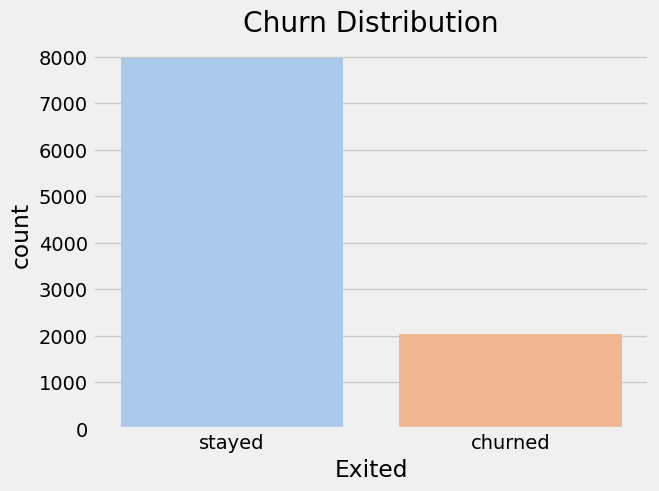

In [147]:
sns.countplot(x='Exited', data=df, palette='pastel')
plt.title('Churn Distribution')
plt.xticks([0,1], ['stayed', 'churned'])
plt.ylabel('count')
plt.show()

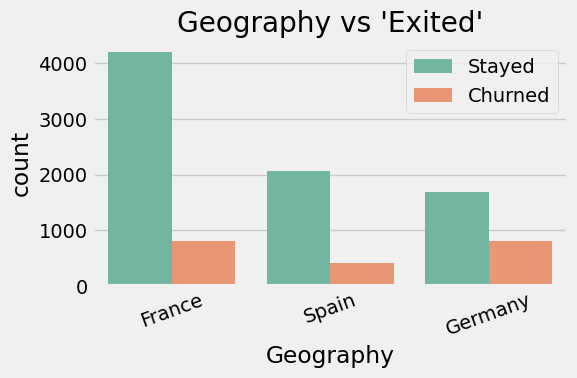

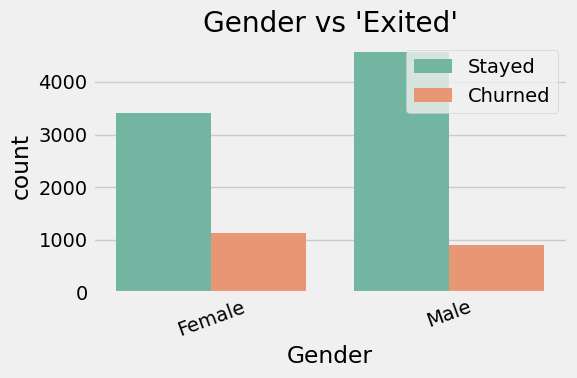

In [148]:
for col in df.columns:
    if df[col].dtype == 'object':
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, hue='Exited', data=df, palette='Set2')
        plt.title(f"{col} vs 'Exited'")
        plt.legend(labels=['Stayed', 'Churned'])
        plt.xticks(rotation=20)
        plt.tight_layout()
        plt.show()

In [149]:
## Encode Categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [150]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo=OneHotEncoder()
geo_encoder=onehot_encoder_geo.fit_transform(df[['Geography']])
print(geo_encoder)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>
  Coords	Values
  (0, 0)	1.0
  (1, 2)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 2)	1.0
  (5, 2)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 2)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 2)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 2)	1.0
  (18, 2)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 2)	1.0
  (22, 2)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (9975, 1)	1.0
  (9976, 0)	1.0
  (9977, 0)	1.0
  (9978, 0)	1.0
  (9979, 0)	1.0
  (9980, 2)	1.0
  (9981, 1)	1.0
  (9982, 1)	1.0
  (9983, 0)	1.0
  (9984, 1)	1.0
  (9985, 0)	1.0
  (9986, 1)	1.0
  (9987, 2)	1.0
  (9988, 0)	1.0
  (9989, 2)	1.0
  (9990, 1)	1.0
  (9991, 0)	1.0
  (9992, 2)	1.0
  (9993, 0)	1.0
  (9994, 0)	1.0
  (9995, 0)	1.0
  (9996, 0)	1.0
  (9997, 0)	1.0
  (9998, 1)	1.0
  (9999, 0)	1.0


In [151]:
geo_encoder.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], shape=(10000, 3))

In [152]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [153]:
geo_encoded_df = pd.DataFrame(geo_encoder.toarray(), columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [154]:
df = pd.concat([df.drop('Geography', axis=1),geo_encoded_df], axis=1)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [155]:
## save the encoders and scaler
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl', 'wb') as file:
    pickle.dump(onehot_encoder_geo,file)

In [159]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
## Divide the dataset into dependent and ndependent dataset
X=df.drop('Exited',axis=1)
y=df['Exited']

## Split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##Scale these features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [161]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler, file)

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
import pandas as pd

# Define models and hyperparameter grids
model_params = {
    "Logistic Regression": {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    "Random Forest": {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [5, 10, None]
        }
    },
    "SVM": {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    "Decision Tree": {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5, 10, None],
            'criterion': ['gini', 'entropy']
        }
    }
}

# Store results
results = []

# Loop through each model and perform GridSearch
for name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='f1', n_jobs=-1)
    clf.fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Best Params': clf.best_params_,
        'Accuracy': acc,
        'Recall': rec,
        'F1 Score': f1
    })

# Results as DataFrame
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)


                 Model                                  Best Params  Accuracy  \
1        Random Forest     {'max_depth': None, 'n_estimators': 100}    0.8395   
2                  SVM                   {'C': 10, 'kernel': 'rbf'}    0.7860   
3        Decision Tree  {'criterion': 'entropy', 'max_depth': None}    0.7910   
0  Logistic Regression            {'C': 0.1, 'solver': 'liblinear'}    0.7210   

     Recall  F1 Score  
1  0.600509  0.595208  
2  0.656489  0.546610  
3  0.569975  0.517321  
0  0.709924  0.500000  


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.59      0.59      0.59       393

    accuracy                           0.84      2000
   macro avg       0.74      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



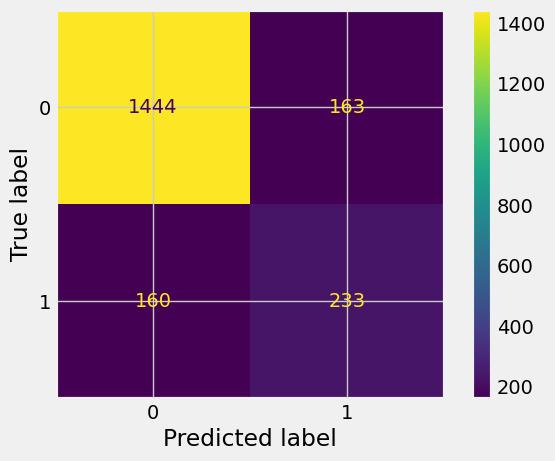

In [164]:
from sklearn.ensemble import RandomForestClassifier

best_rf = RandomForestClassifier(max_depth=None, n_estimators=100, random_state=42)
best_rf.fit(X_train_res, y_train_res)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = best_rf.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [165]:
import pickle

with open('best_rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)


In [166]:
%pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/375.7 MB 5.6 MB/s eta 0:01:08
   ---------------------------------------- 1.8/375.7 MB 5.6 MB/s eta 0:01:07
   ---------------------------------------- 2.9/375.7 MB 5.6 MB/s eta 0:01:07
   ---------------------------------------- 4.2/375.7 MB 5.9 MB/s eta 0:01:04
    --------------------------------------- 

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.2 which is incompatible.


In [181]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [182]:
print(X_train_res.shape[1],)

12


In [183]:
model = Sequential([
    Dense(64, activation='relu',input_shape=(X_train_res.shape[1],)), ##HL1 Connected with input layer
    Dense(32, activation='relu'), ## HL2
    Dense(1, activation='sigmoid') ## output layer
])

c:\Python\venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [184]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()

In [186]:

## Compile the model
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])

In [187]:
import tensorflow
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
log_dir="logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir, histogram_freq=1)

In [188]:
## Setup early stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=7,restore_best_weights=True)

In [189]:
### Training the model
history=model.fit(
    X_train_res,y_train_res,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7463 - loss: 0.5136 - val_accuracy: 0.8015 - val_loss: 0.4263
Epoch 2/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7993 - loss: 0.4306 - val_accuracy: 0.7305 - val_loss: 0.5449
Epoch 3/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7985 - loss: 0.4313 - val_accuracy: 0.7665 - val_loss: 0.5060
Epoch 4/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8126 - loss: 0.4091 - val_accuracy: 0.8085 - val_loss: 0.4328
Epoch 5/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8115 - loss: 0.3992 - val_accuracy: 0.7965 - val_loss: 0.4587
Epoch 6/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8235 - loss: 0.3887 - val_accuracy: 0.7825 - val_loss: 0.4742
Epoch 7/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8260 - loss: 0.3804 - val_accuracy: 0.7985 - val_loss: 0.4551
Epoch 8/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8312 - loss: 0.3678 - val_accu

In [190]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8027 - loss: 0.4239
✅ Test Accuracy: 0.80


In [192]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, roc_auc_score

# Predict probabilities
y_pred_probs = model.predict(X_test)

# Convert to labels
y_pred = (y_pred_probs >= 0.5).astype(int)

# Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: additional metrics
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_probs):.2f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87      1607
           1       0.50      0.66      0.57       393

    accuracy                           0.80      2000
   macro avg       0.70      0.75      0.72      2000
weighted avg       0.83      0.80      0.81      2000

F1 Score: 0.57
Recall: 0.66
AUC-ROC: 0.83


In [193]:
model.save('model.h5')
